# 특성 스케일 맞추기

scikit-learn에서는 다음과 같은 스케일링 클래스를 제공한다.

* StandardScaler(X): 평균이 0과 표준편차가 1이 되도록 변환.
* MinMaxScaler(X): 최대값이 각각 1, 최소값이 0이 되도록 변환

# 사이킷런 StandardScaler
사용방법은 다음과 같다.

* (1)`fit` : 학습용 데이터의 분포 추정, 학습용 데이터를 입력으로 하여 fit 메서드를 실행하면 분포 모수를 객체내에 저장
* (2)`transform` : 학습용 데이터 변환, 학습용 데이터를 입력으로 하여 transform 메서드를 실행하면 학습용 데이터를 변환
* (3)`fit_transform` : (1)번과 (2)번 과정을 합쳐서 fit_transform 메서드를 사용할 수도 있다.
* 학습용 데이터에는 fit_transform()메서드를 적용하고, 테스트 데이터에는 transform()메서드를 적용

train data와 test data가 다른 스케일로 조정되면 훈련된 모형이 test data를 잘못 인식하여 정확한 성능 평가가 이루어지지 않는다. 따라서 train data와 test data는 같은 비율로 전처리 되어야 한다.


In [ ]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/aonekoda/reference/main/data/example.csv')
data

,height,weight
0,170,70
1,156,75
2,177,80
3,180,65
4,165,59


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(data, test_size=0.4, random_state=0)

In [ ]:
X_train

,height,weight
1,156,75
3,180,65
4,165,59


In [ ]:
X_test

,height,weight
2,177,80
0,170,70


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

print('X_train : \n', X_train_std)
print('X_test : \n',X_test_std)

X_train : 
 [[-1.1111678   1.31319831]
 [ 1.31319831 -0.20203051]
 [-0.20203051 -1.1111678 ]]
X_test : 
 [[1.01015254 2.07081272]
 [0.30304576 0.5555839 ]]


# 스케일 조정 효과

데이터의 스케일을 조정하면 조정하지 않을때 보다 학습이 잘 이루어져 모형의 정확도가 향상된다.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    stratify=cancer.target,
                                                    random_state=0)
print(X_train.shape)


(426, 30)


사이킷런에서 제공하는 유방암 데이터셋에는 스케일이 매우 다른 특성변수가 있다.

['mean perimeter' 'mean area']


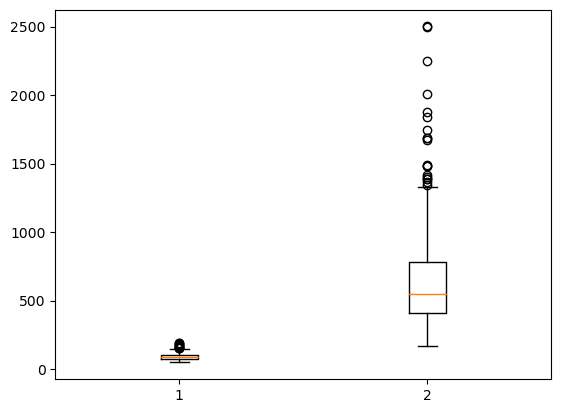

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

print(cancer.feature_names[[2,3]])

plt.boxplot(X_train[:,2:4])
plt.show()

### 데이터 스케일 조정을 하지 않는 경우

In [ ]:
from sklearn.svm import SVC

svc = SVC(gamma='auto')
svc.fit(X_train, y_train)
print('test accuracy: %.3f'%(svc.score(X_test, y_test)))

test accuracy: 0.629


### 데이터 스케일을 조정한 경우

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler() #scaler = StandardScaler()

X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

svc.fit(X_train_scale, y_train)

print('test accuracy: %.3f'%(svc.score(X_test_scale, y_test)))

test accuracy: 0.951


데이터의 스케일을 조정하여 모형의 성능이 개선되었다.

## 실습하기

1. sklearn의 wine 데이터를 다음과 같이 읽어들이시오.
```
from sklearn.datasets import load_wine
data = load_wine()
x = data.data
y = data.target
```

2. 읽어들인 데이터에 대해서 scaling을 수행하시오.(StandardScaler/MinMaxScaler)